In [55]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

matplotlib.style.use('ggplot')

In [2]:
gce_download = pd.read_json('cooked/gce_download_count10_parallelism1.json')
ursine_download = pd.read_json('cooked/ursine_download_count10_parallelism1.json')

In [3]:
gce_download['rate'] = gce_download['ContentLength']/gce_download['ElapsedTime']
ursine_download['rate'] = ursine_download['ContentLength']/ursine_download['ElapsedTime']

gce_mean_size = gce_download['ContentLength'].mean()
gce_mean_rate = gce_download['rate'].mean()
gce_stddev_rate = gce_download['rate'].std()
gce_mean_time = gce_download['ElapsedTime'].mean()

ursine_mean_rate = ursine_download['rate'].mean()
ursine_stddev_rate = ursine_download['rate'].std()
ursine_mean_time = ursine_download['ElapsedTime'].mean()

print(gce_mean_size/(1024*1024*1024))
print(gce_mean_rate/(1024*1024), gce_mean_stddev, gce_mean_time)
print(ursine_mean_rate/(1024*1024), ursine_mean_stddev, ursine_mean_time)

13.0884130942


NameError: name 'gce_mean_stddev' is not defined

In [35]:
with open('cooked/ursine_random_frames_count841_parallelism1.json') as data_file:    
    data = json.load(data_file)
    
ursine_json = data['Data']

with open('cooked/gce_random_frames_count841_parallelism1.json') as data_file:    
    data = json.load(data_file)

    
gce_json = data['Data']

AttributeError: 'list' object has no attribute 'read'

In [36]:
ursine_random = pd.read_json(json.dumps(ursine_json) )
gce_random = pd.read_json(json.dumps(gce_json) )


     BytesRead  ContentLength  ElapsedTime  \
0      3436414             -1     1.989217   
1      2200451             -1     2.585967   
2         8470             -1     0.793866   
3      3421416             -1     2.056263   
4      3431887             -1     1.813468   
5      3449257             -1     1.911472   
6      3432907             -1     2.184003   
7      3432479             -1     1.912004   
8      3425348             -1     2.242570   
9      3449041             -1     1.909232   
10     3445035             -1     2.259979   
11     3442794             -1     2.050464   
12     3440552             -1     2.165219   
13     3003974             -1     2.181348   
14     3446628             -1     2.270831   
15     3445364             -1     1.951839   
16     3447443             -1     1.932758   
17     3439907             -1     2.000611   
18     3438376             -1     1.941901   
19     3458528             -1     2.257871   
20     3445713             -1     

In [44]:
ursine_mean_time = ursine_random['ElapsedTime'].mean()
gce_mean_time = gce_random['ElapsedTime'].mean()

print(ursine_mean_time, 1/ursine_mean_time, ursine_random['ElapsedTime'].sum())
print(gce_mean_time, 1/gce_mean_time, gce_random['ElapsedTime'].sum())

1.93093834434 0.51788292616 1623.91914759
1.54951428476 0.645363524451 1303.14151348


In [58]:
%matplotlib inline 
gce_parallelism = pd.DataFrame( {'Threads': [1,2,4,8,16,32],
                                'ElapsedTime': [1303.14151348, 745.007184, 442.582837, 263.300616, 187.815133, 213.433757]})
print(gce_parallelism)

   ElapsedTime  Threads
0  1303.141513        1
1   745.007184        2
2   442.582837        4
3   263.300616        8
4   187.815133       16
5   213.433757       32


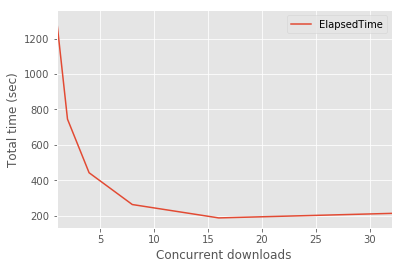

In [68]:
plt.figure()
axes = gce_parallelism.plot(x='Threads')
axes.set_xlabel('Concurrent downloads')
axes.set_ylabel('Total time (sec)')